In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
import pickle

In [2]:
data=pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [5]:
data.shape

(1470, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.drop(["Over18","EmployeeCount","StandardHours","EmployeeNumber"],axis=1,inplace=True)

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
attrition_count=pd.DataFrame(data["Attrition"].value_counts())
attrition_count

,count
Attrition,
No,1233
Yes,237


<Axes: xlabel='Attrition', ylabel='count'>

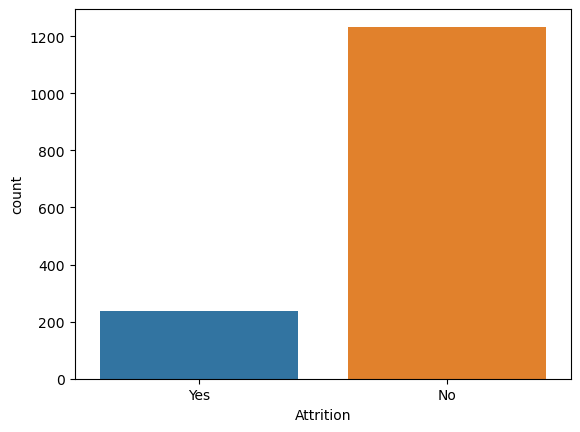

In [11]:
sns.countplot(x="Attrition",data=data)

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [14]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [15]:
Business=LabelEncoder()
data["BusinessTravel"]=Business.fit_transform(data["BusinessTravel"])
Department=LabelEncoder()
data["Department"]=Department.fit_transform(data["Department"])
Education=LabelEncoder()
data["EducationField"]=Education.fit_transform(data["EducationField"])
Gender=LabelEncoder()
data["Gender"]=Gender.fit_transform(data["Gender"])
Job=LabelEncoder()
data["JobRole"]=Job.fit_transform(data["JobRole"])
Marital=LabelEncoder()
data["MaritalStatus"]=Marital.fit_transform(data["MaritalStatus"])
Over=LabelEncoder()
data["OverTime"]=Over.fit_transform(data["OverTime"])
Attrition=LabelEncoder()
data["Attrition"]=Attrition.fit_transform(data["Attrition"])

In [16]:
correlation=data.corr()
correlation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


{'whiskers': [<matplotlib.lines.Line2D at 0x2087b477fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087bb616d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087bb53d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087bb62a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087bb633d0>],
 'means': []}

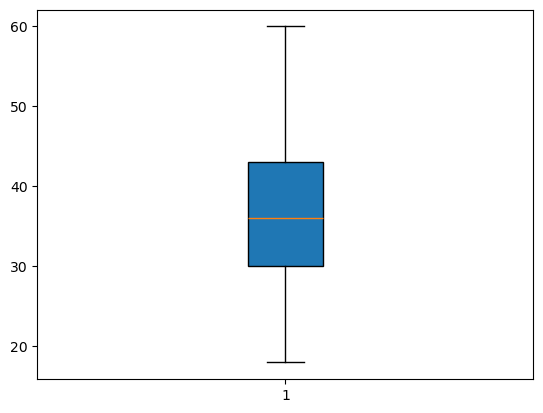

In [17]:
plt.boxplot(data["Age"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087bbbc590>,
 'caps': [<matplotlib.lines.Line2D at 0x2087bb71c90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087b476d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087bbbedd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087bbbf850>],
 'means': []}

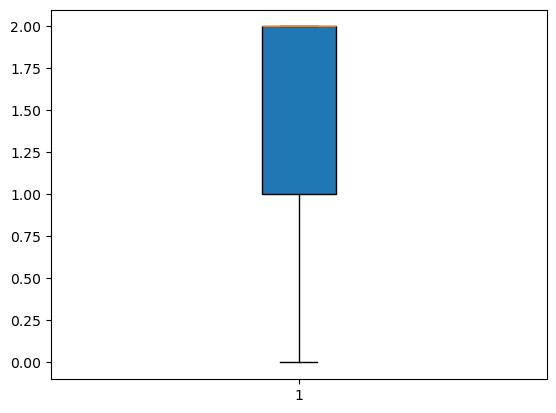

In [18]:
plt.boxplot(data["BusinessTravel"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087bc2a490>,
 'caps': [<matplotlib.lines.Line2D at 0x2087bc2bc90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087b35ed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087bc312d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087bc31e10>],
 'means': []}

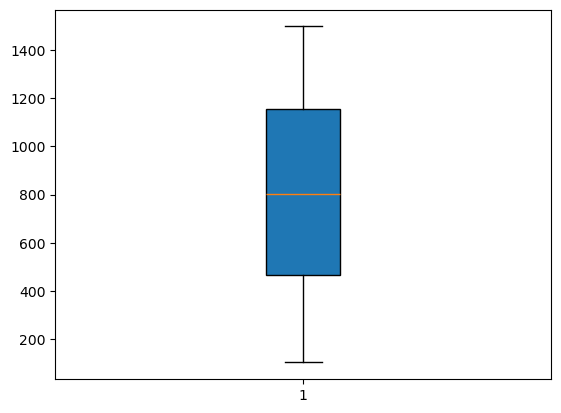

In [19]:
plt.boxplot(data["DailyRate"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cddb590>,
 'caps': [<matplotlib.lines.Line2D at 0x2087ce05a10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087cde7b10>],
 'medians': [<matplotlib.lines.Line2D at 0x2087ce07010>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087ce07a50>],
 'means': []}

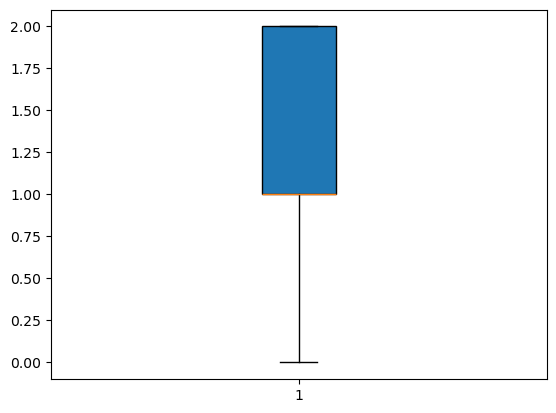

In [20]:
plt.boxplot(data["Department"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087ce6d750>,
 'caps': [<matplotlib.lines.Line2D at 0x2087ce6efd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087ce6ce10>],
 'medians': [<matplotlib.lines.Line2D at 0x2087ce78490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087ce78e90>],
 'means': []}

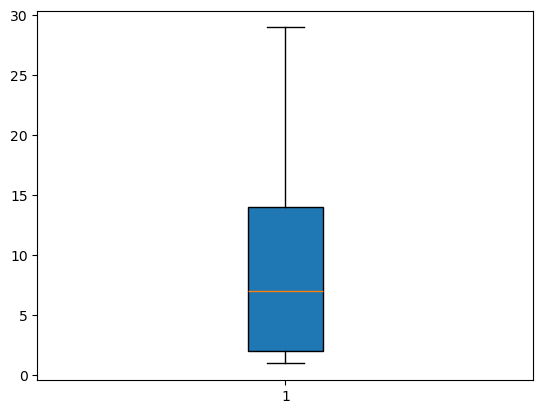

In [21]:
plt.boxplot(data["DistanceFromHome"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cc97190>,
 'caps': [<matplotlib.lines.Line2D at 0x2087cca8a10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087cc8af50>],
 'medians': [<matplotlib.lines.Line2D at 0x2087ccaa090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087ccaaa50>],
 'means': []}

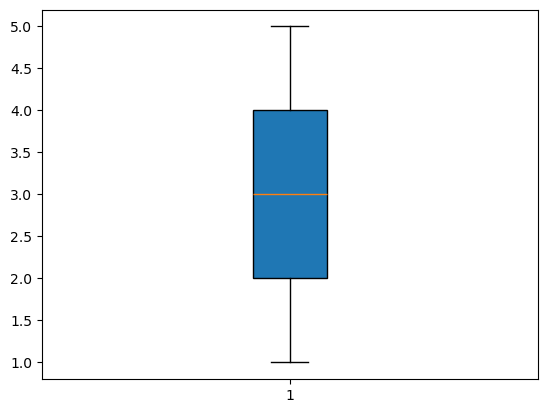

In [22]:
plt.boxplot(data["Education"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cd07490>,
 'caps': [<matplotlib.lines.Line2D at 0x2087cd14d10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087ccced50>],
 'medians': [<matplotlib.lines.Line2D at 0x2087cd16110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087cd16c10>],
 'means': []}

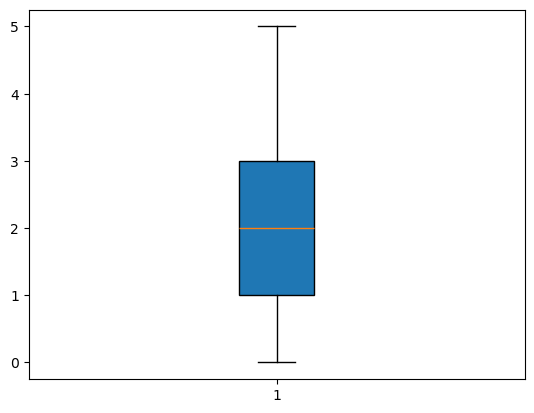

In [23]:
plt.boxplot(data["EducationField"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cd669d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087ceb4250>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087cd66050>],
 'medians': [<matplotlib.lines.Line2D at 0x2087ceb5510>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087ceb6050>],
 'means': []}

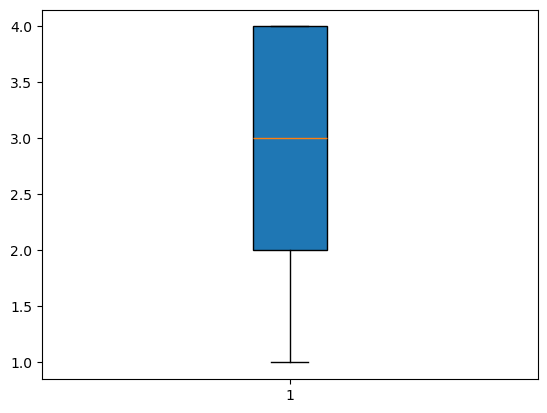

In [24]:
plt.boxplot(data["EnvironmentSatisfaction"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cf0fb10>,
 'caps': [<matplotlib.lines.Line2D at 0x2087cf19310>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087ceb6d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087cf1a850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087cf1b350>],
 'means': []}

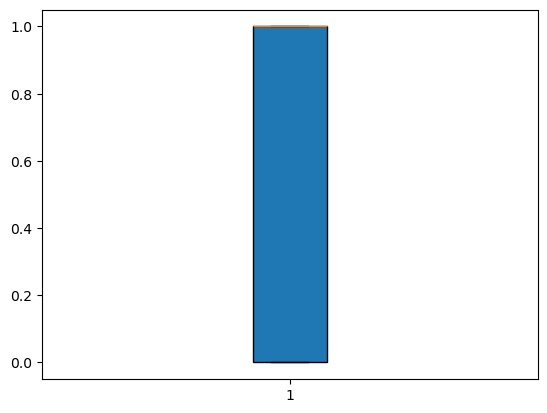

In [25]:

plt.boxplot(data["Gender"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cf91ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087cf93550>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087cf91750>],
 'medians': [<matplotlib.lines.Line2D at 0x2087cf9cc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087cf9d6d0>],
 'means': []}

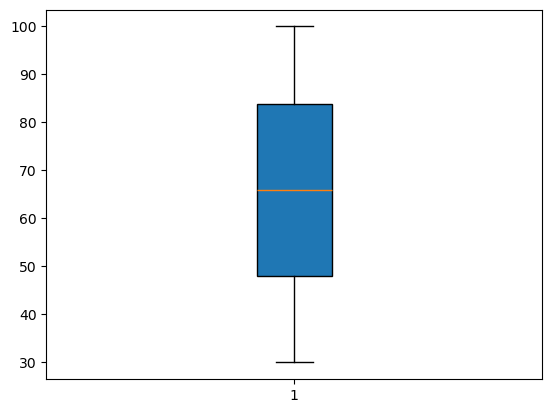

In [26]:
plt.boxplot(data["HourlyRate"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087d13cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x2087d13e6d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087d13c350>],
 'medians': [<matplotlib.lines.Line2D at 0x2087d13fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087d148650>],
 'means': []}

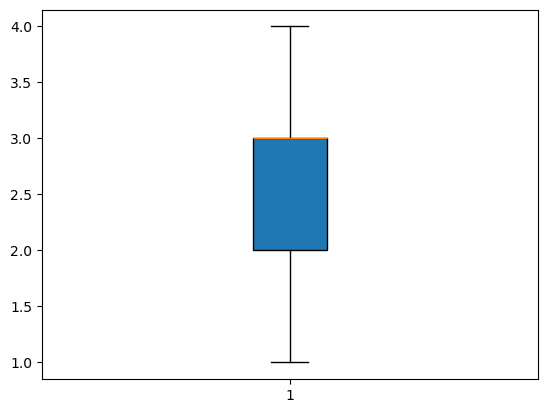

In [27]:
plt.boxplot(data["JobInvolvement"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087d1666d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087d1ab8d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087d0fed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087d1b8e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087d1b9890>],
 'means': []}

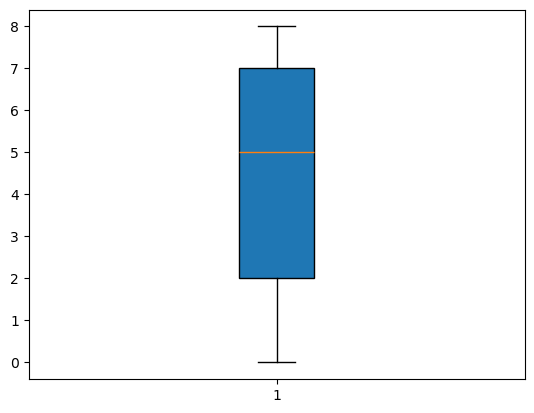

In [28]:
plt.boxplot(data["JobRole"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087d1c7fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087cfd3750>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087cfd1790>],
 'medians': [<matplotlib.lines.Line2D at 0x2087cf617d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087cfd1e90>],
 'means': []}

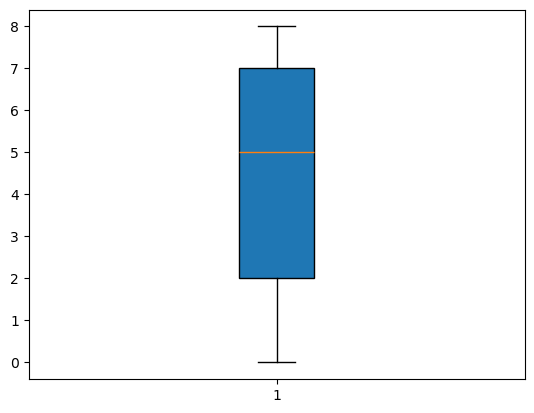

In [29]:
plt.boxplot(data["JobRole"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087cff5a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2087d03fbd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087d006d50>],
 'medians': [<matplotlib.lines.Line2D at 0x2087d045050>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087d045a10>],
 'means': []}

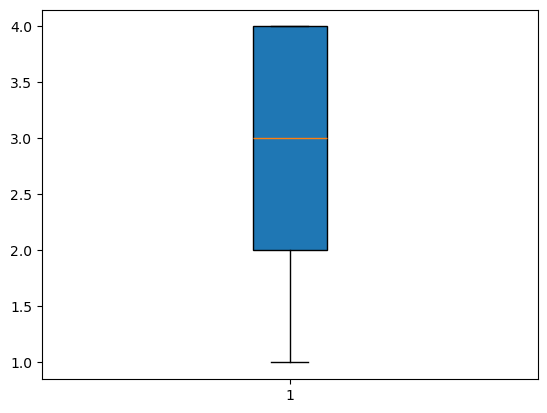

In [30]:
plt.boxplot(data["JobSatisfaction"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087d08e290>,
 'caps': [<matplotlib.lines.Line2D at 0x2087d1f0bd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087d0a2910>],
 'medians': [<matplotlib.lines.Line2D at 0x2087d1f2190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087d1f2c10>],
 'means': []}

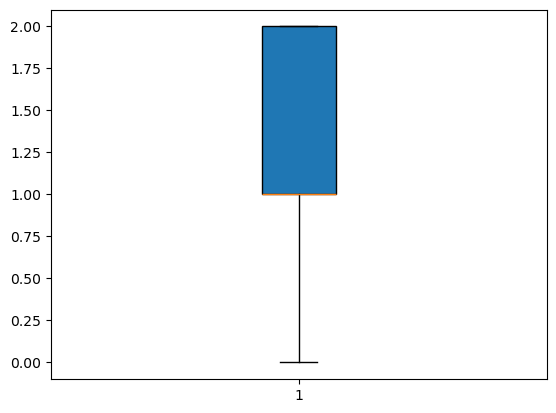

In [31]:
plt.boxplot(data["MaritalStatus"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087d24b950>,
 'caps': [<matplotlib.lines.Line2D at 0x2087d2550d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087d24ae50>],
 'medians': [<matplotlib.lines.Line2D at 0x2087d256490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087d256e50>],
 'means': []}

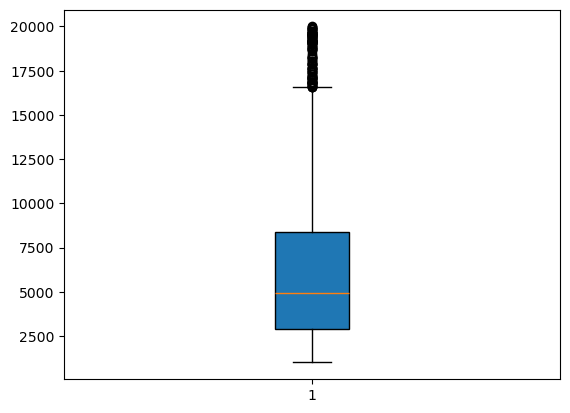

In [32]:
plt.boxplot(data["MonthlyIncome"],patch_artist=True)

In [33]:
print(f"old shape of data {data.shape}")
Q1=data["MonthlyIncome"].quantile(0.25)
Q3=data["MonthlyIncome"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["MonthlyIncome"]<=lower)[0]
upper_index=np.where(data["MonthlyIncome"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (1470, 31)
8379.0 2911.0 5468.0
new shape of data (1356, 31)


In [34]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087d2ba390>,
 'caps': [<matplotlib.lines.Line2D at 0x2087d2bbf10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087d2ba350>],
 'medians': [<matplotlib.lines.Line2D at 0x2087d2c5590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087d2c5fd0>],
 'means': []}

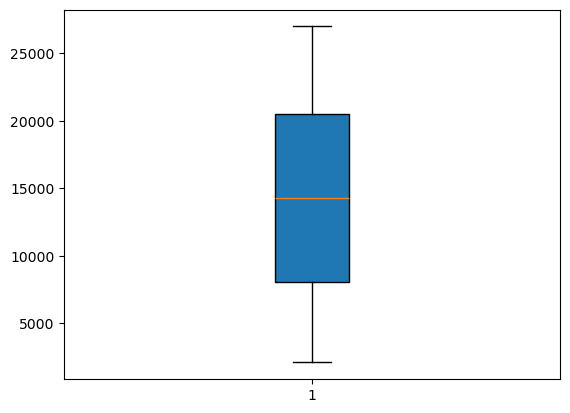

In [35]:
plt.boxplot(data["MonthlyRate"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e31a950>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e335190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e326f10>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e336690>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e337190>],
 'means': []}

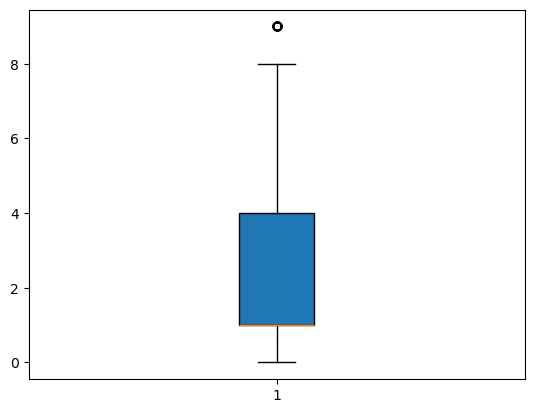

In [36]:
plt.boxplot(data["NumCompaniesWorked"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e388550>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e3972d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e395090>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e3a0850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e3a1290>],
 'means': []}

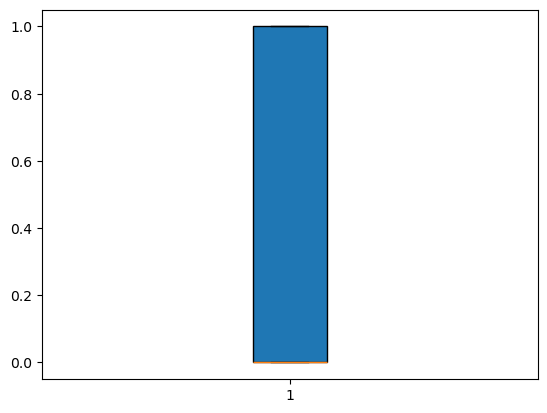

In [37]:
plt.boxplot(data["OverTime"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e3dda90>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e3f5e90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e3ebe10>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e3f7490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e3f7f50>],
 'means': []}

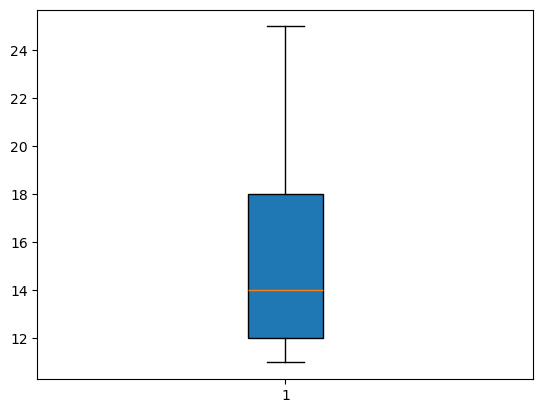

In [38]:
plt.boxplot(data["PercentSalaryHike"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e461590>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e462d50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e3bed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e468310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e468d90>],
 'means': []}

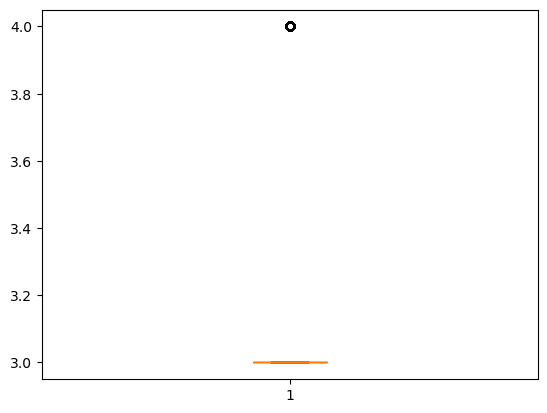

In [39]:
plt.boxplot(data["PerformanceRating"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e4c93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e4a9510>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e4c89d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e4cbfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e4d4a50>],
 'means': []}

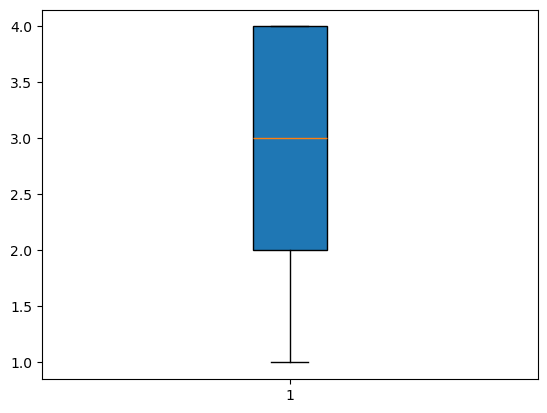

In [40]:
plt.boxplot(data["RelationshipSatisfaction"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e52a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e52ba90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e4eed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e53d090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e53db50>],
 'means': []}

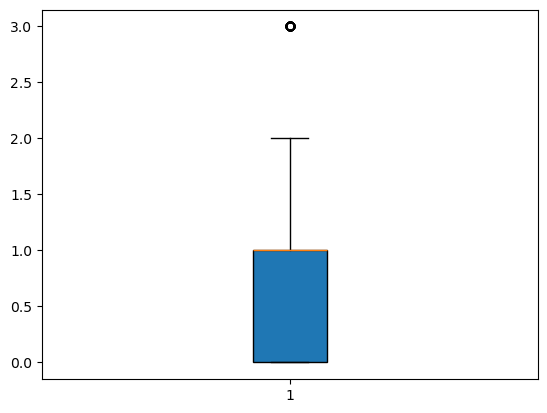

In [41]:
plt.boxplot(data["StockOptionLevel"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e58e350>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e5a8b90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e41ed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e5aa190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e5aaad0>],
 'means': []}

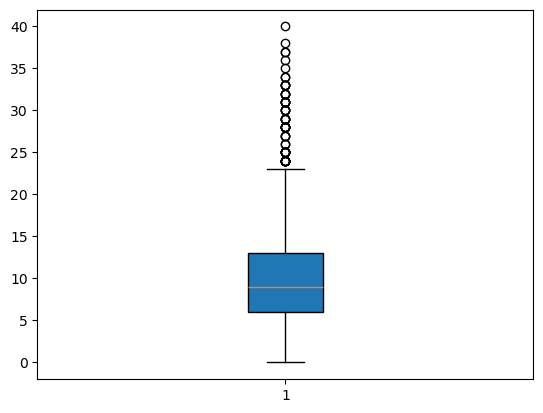

In [42]:
plt.boxplot(data["TotalWorkingYears"],patch_artist=True)

In [43]:
print(f"old shape of data {data.shape}")
Q1=data["TotalWorkingYears"].quantile(0.25)
Q3=data["TotalWorkingYears"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["TotalWorkingYears"]<=lower)[0]
upper_index=np.where(data["TotalWorkingYears"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (1356, 31)
13.0 6.0 7.0
new shape of data (1295, 31)


In [44]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e605910>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e5f97d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e5ceb50>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e618150>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e618cd0>],
 'means': []}

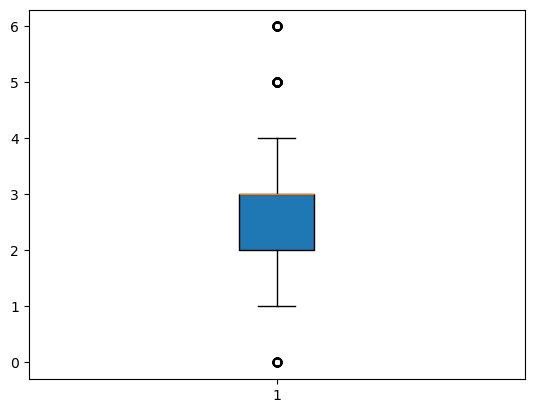

In [45]:
plt.boxplot(data["TrainingTimesLastYear"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e666c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e6802d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e665ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e6817d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e6821d0>],
 'means': []}

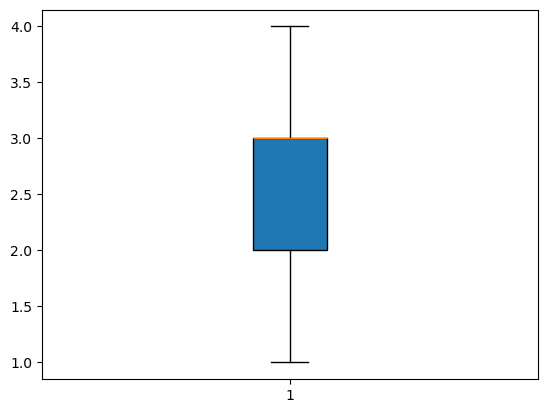

In [46]:
plt.boxplot(data["WorkLifeBalance"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e6d76d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087e6e0f10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e58ed90>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e6e23d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e6e2dd0>],
 'means': []}

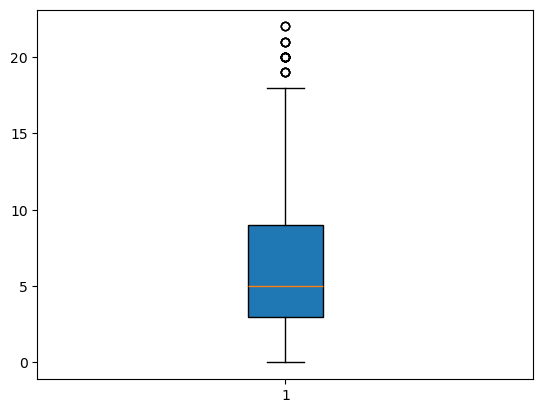

In [47]:
plt.boxplot(data["YearsAtCompany"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e6d66d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2087f84e850>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087f84c6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2087f84fb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087f860690>],
 'means': []}

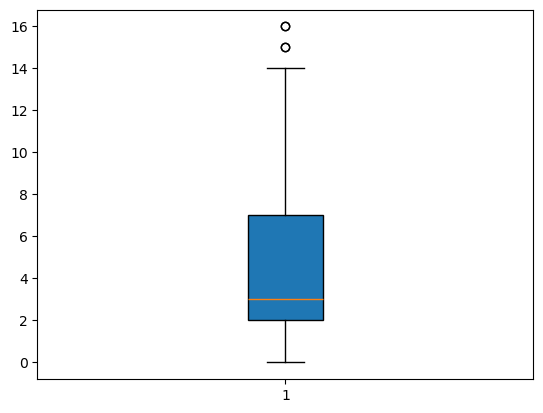

In [48]:
plt.boxplot(data["YearsInCurrentRole"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087f8c5250>,
 'caps': [<matplotlib.lines.Line2D at 0x2087f8c6710>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087f8c4810>],
 'medians': [<matplotlib.lines.Line2D at 0x2087f8c7c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087f8cc690>],
 'means': []}

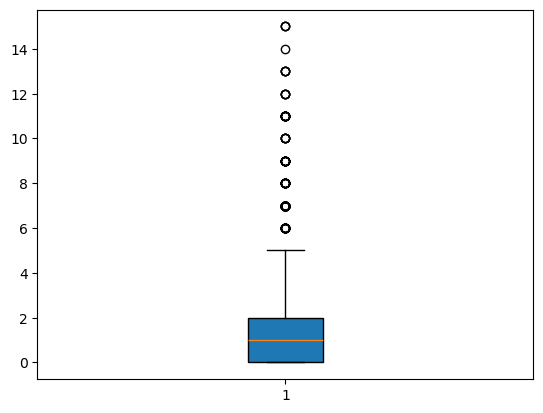

In [49]:
plt.boxplot(data["YearsSinceLastPromotion"],patch_artist=True)

In [50]:
print(f"old shape of data {data.shape}")
Q1=data["YearsSinceLastPromotion"].quantile(0.25)
Q3=data["YearsSinceLastPromotion"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["YearsSinceLastPromotion"]<=lower)[0]
upper_index=np.where(data["YearsSinceLastPromotion"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (1295, 31)
2.0 0.0 2.0
new shape of data (1101, 31)


In [51]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2087e717690>,
 'caps': [<matplotlib.lines.Line2D at 0x2087f90f650>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2087e716ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2087e726150>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087e726bd0>],
 'means': []}

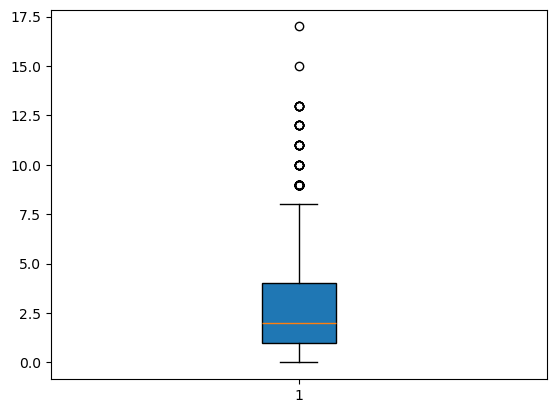

In [52]:
plt.boxplot(data["YearsWithCurrManager"],patch_artist=True)

In [53]:
print(f"old shape of data {data.shape}")
Q1=data["YearsWithCurrManager"].quantile(0.25)
Q3=data["YearsWithCurrManager"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["YearsWithCurrManager"]<=lower)[0]
upper_index=np.where(data["YearsWithCurrManager"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (1101, 31)
4.0 1.0 3.0
new shape of data (1039, 31)


In [54]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

In [55]:
x=data.drop("Attrition",axis=1)
y=data["Attrition"]

In [56]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1035,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1036,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1037,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [58]:
x_train.shape

(831, 30)

In [59]:
from collections import Counter

In [60]:
Counter(y_train)

Counter({0: 675, 1: 156})

In [61]:
smt=SMOTE()
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

In [62]:
Counter(y_train_smt)

Counter({1: 675, 0: 675})

#### Applying MinMaxScaler 

In [63]:
scaler=MinMaxScaler()
x_train_smt=scaler.fit_transform(x_train_smt)
x_test=scaler.transform(x_test)

### Logistic Regression

In [64]:
model1=LogisticRegression()
model1.fit(x_train_smt,y_train_smt)

LogisticRegression()

In [65]:
print("Train Score",model1.score(x_train_smt,y_train_smt))
print("Test Score",model1.score(x_test,y_test))

Train Score 0.845925925925926
Test Score 0.8221153846153846


In [66]:
y_pred1=model1.predict(x_test)

In [67]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred1})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [68]:
scorelr1=accuracy_score(y_test,y_pred1)
scorelr1

0.8221153846153846

In [69]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[152,  21],
       [ 16,  19]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

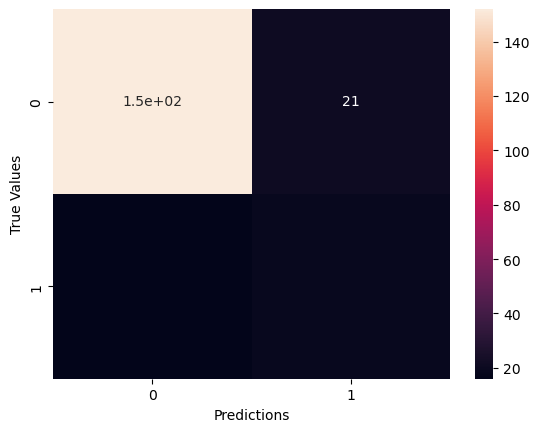

In [70]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")

In [71]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       173
           1       0.47      0.54      0.51        35

    accuracy                           0.82       208
   macro avg       0.69      0.71      0.70       208
weighted avg       0.83      0.82      0.83       208



### DecisionTreeClassifier

In [72]:
model2=DecisionTreeClassifier()
model2.fit(x_train_smt,y_train_smt)
print("Train Score",model2.score(x_train_smt,y_train_smt))
print("Test Score",model2.score(x_test,y_test))

Train Score 1.0
Test Score 0.6586538461538461


In [73]:
y_pred2=model2.predict(x_test)

In [74]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred2})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,1
1026,0,0
706,0,0
486,0,0


In [75]:
scoreDT1=accuracy_score(y_test,y_pred2)
scoreDT1

0.6586538461538461

In [76]:
cm=confusion_matrix(y_test,y_pred2)
cm


array([[127,  46],
       [ 25,  10]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

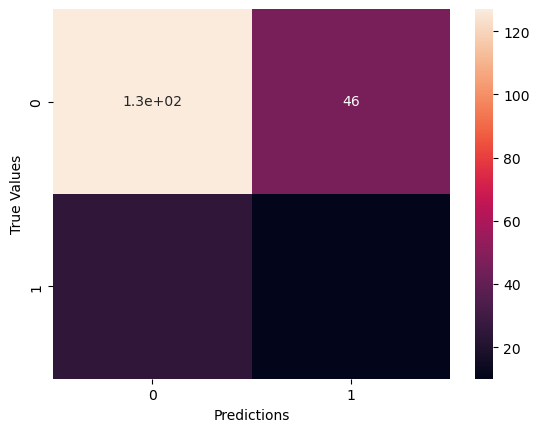

In [77]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [78]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       173
           1       0.18      0.29      0.22        35

    accuracy                           0.66       208
   macro avg       0.51      0.51      0.50       208
weighted avg       0.72      0.66      0.69       208



In [79]:
model2.get_depth()

21

In [80]:
model3=DecisionTreeClassifier(max_depth=5)
model3.fit(x_train_smt,y_train_smt)
print("Train Score",model3.score(x_train_smt,y_train_smt))
print("Test Score",model3.score(x_test,y_test))

Train Score 0.8451851851851852
Test Score 0.7115384615384616


In [81]:
y_pred3=model3.predict(x_test)

In [82]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred3})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,1


In [83]:
scoreDT2=accuracy_score(y_test,y_pred3)
scoreDT2

0.7115384615384616

In [84]:
cm=confusion_matrix(y_test,y_pred3)
cm


array([[129,  44],
       [ 16,  19]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

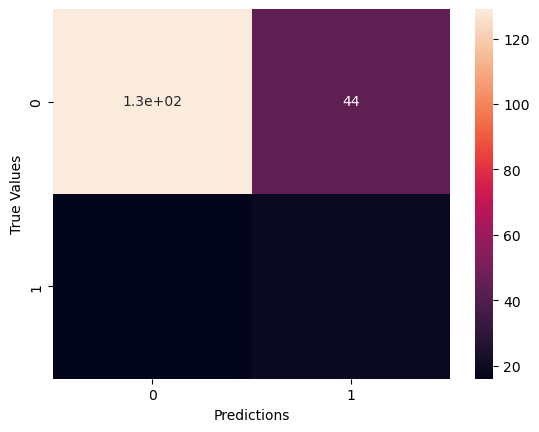

In [85]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [86]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       173
           1       0.30      0.54      0.39        35

    accuracy                           0.71       208
   macro avg       0.60      0.64      0.60       208
weighted avg       0.79      0.71      0.74       208



### RandomForestClassifier

In [87]:
model4=RandomForestClassifier(random_state=10)
model4.fit(x_train_smt,y_train_smt)
print("Train Score",model4.score(x_train_smt,y_train_smt))
print("Test Score",model4.score(x_test,y_test))

Train Score 1.0
Test Score 0.8317307692307693


In [88]:
y_pred4=model4.predict(x_test)

In [89]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred4})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,0
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [90]:
scoreRF1=accuracy_score(y_test,y_pred4)
scoreRF1

0.8317307692307693

In [91]:
cm=confusion_matrix(y_test,y_pred4)
cm


array([[163,  10],
       [ 25,  10]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

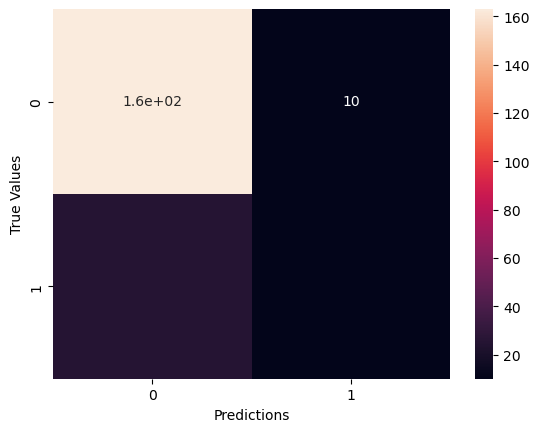

In [92]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [93]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       173
           1       0.50      0.29      0.36        35

    accuracy                           0.83       208
   macro avg       0.68      0.61      0.63       208
weighted avg       0.81      0.83      0.81       208



In [94]:
model5=RandomForestClassifier(n_estimators=50,random_state=1)
model5.fit(x_train_smt,y_train_smt)
print("Train Score",model5.score(x_train_smt,y_train_smt))
print("Test Score",model5.score(x_test,y_test))

Train Score 1.0
Test Score 0.8509615384615384


In [95]:
y_pred5=model5.predict(x_test)

In [96]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred5})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,0
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [97]:
scoreRF2=accuracy_score(y_test,y_pred5)
scoreRF2

0.8509615384615384

In [98]:
cm=confusion_matrix(y_test,y_pred5)
cm


array([[167,   6],
       [ 25,  10]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

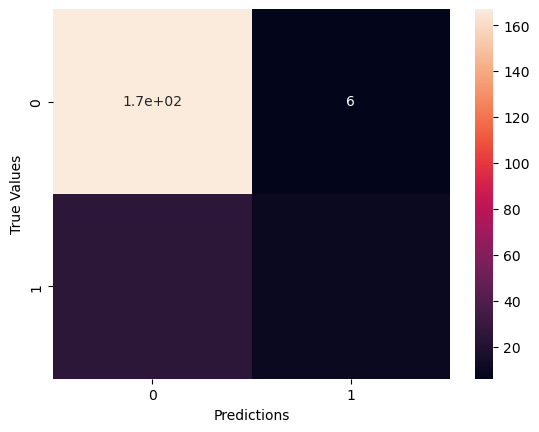

In [99]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [100]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       173
           1       0.62      0.29      0.39        35

    accuracy                           0.85       208
   macro avg       0.75      0.63      0.65       208
weighted avg       0.83      0.85      0.83       208



### KNN

In [101]:
model6=KNeighborsClassifier()
model6.fit(x_train_smt,y_train_smt)
print("Train Score",model6.score(x_train_smt,y_train_smt))
print("Test Score",model6.score(x_test,y_test))

Train Score 0.8748148148148148
Test Score 0.6826923076923077


In [102]:
y_pred6=model6.predict(x_test)

In [103]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred6})

,True Values,Predicted Values
788,0,1
854,0,1
771,0,0
768,0,1
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [104]:
scoreKNN1=accuracy_score(y_test,y_pred6)
scoreKNN1

0.6826923076923077

In [105]:
cm=confusion_matrix(y_test,y_pred6)
cm


array([[116,  57],
       [  9,  26]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

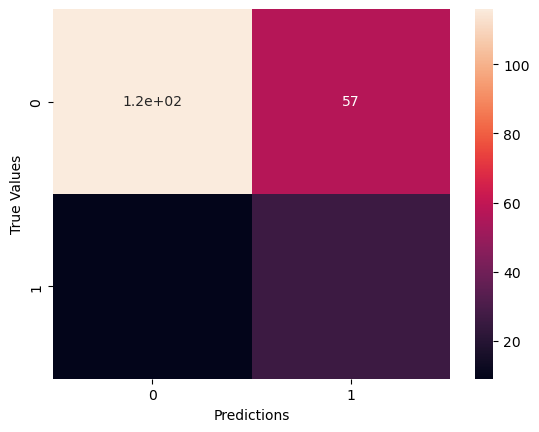

In [106]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [107]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       173
           1       0.31      0.74      0.44        35

    accuracy                           0.68       208
   macro avg       0.62      0.71      0.61       208
weighted avg       0.82      0.68      0.72       208



In [108]:
model7=KNeighborsClassifier(n_neighbors=6)
model7.fit(x_train_smt,y_train_smt)
print("Train Score",model7.score(x_train_smt,y_train_smt))
print("Test Score",model7.score(x_test,y_test))

Train Score 0.8925925925925926
Test Score 0.75


In [109]:
y_pred7=model7.predict(x_test)

In [110]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred7})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [111]:
scoreKNN2=accuracy_score(y_test,y_pred7)
scoreKNN2

0.75

In [112]:
cm=confusion_matrix(y_test,y_pred7)
cm


array([[136,  37],
       [ 15,  20]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

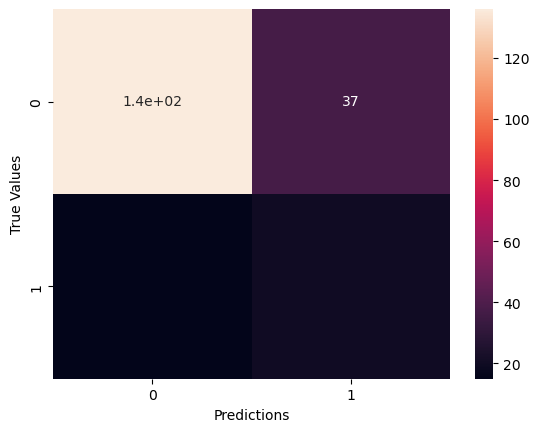

In [113]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [114]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       173
           1       0.35      0.57      0.43        35

    accuracy                           0.75       208
   macro avg       0.63      0.68      0.64       208
weighted avg       0.81      0.75      0.77       208



#### SVC

In [115]:
model8=SVC()
model8.fit(x_train_smt,y_train_smt)
print("Train Score:",model8.score(x_train_smt,y_train_smt))
print("Test Score:",model8.score(x_test,y_test))

Train Score: 0.9392592592592592
Test Score: 0.8557692307692307


In [116]:
y_pred8=model8.predict(x_test)

In [117]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred8})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [118]:
scoreSVC1=accuracy_score(y_test,y_pred8)
scoreSVC1

0.8557692307692307

In [119]:
cm=confusion_matrix(y_test,y_pred8)
cm


array([[166,   7],
       [ 23,  12]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

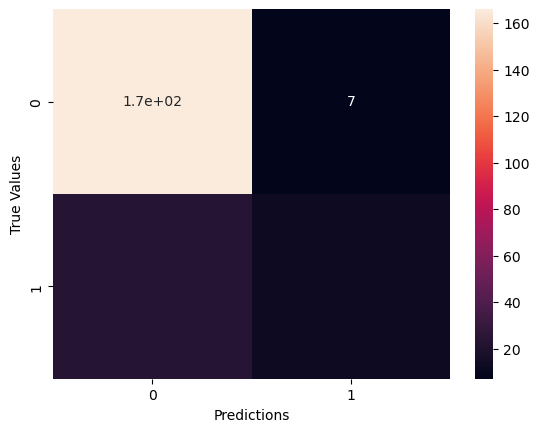

In [120]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [121]:
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       173
           1       0.63      0.34      0.44        35

    accuracy                           0.86       208
   macro avg       0.75      0.65      0.68       208
weighted avg       0.84      0.86      0.84       208



In [122]:
model9=SVC(kernel="linear",C=15,gamma="auto")
model9.fit(x_train_smt,y_train_smt)
print("Train Score",model9.score(x_train_smt,y_train_smt))
print("Test Score",model9.score(x_test,y_test))

Train Score 0.8525925925925926
Test Score 0.8365384615384616


In [123]:
y_pred9=model9.predict(x_test)

In [124]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred9})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [125]:
scoreSVC2=accuracy_score(y_test,y_pred9)
scoreSVC2

0.8365384615384616

In [126]:
cm=confusion_matrix(y_test,y_pred9)
cm


array([[156,  17],
       [ 17,  18]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

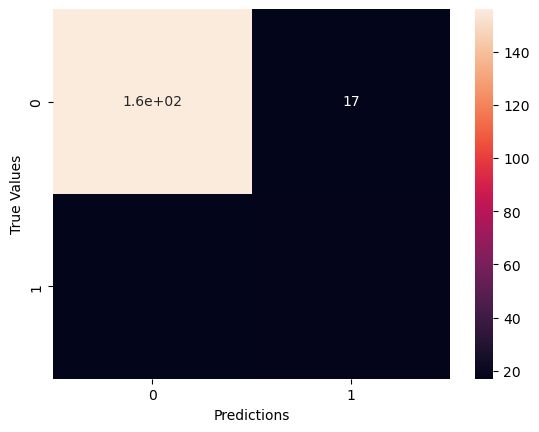

In [127]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [128]:
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       173
           1       0.51      0.51      0.51        35

    accuracy                           0.84       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.84      0.84      0.84       208



In [129]:
model10=SVC(kernel="poly",degree=5)
model10.fit(x_train_smt,y_train_smt)
print("Train Score",model10.score(x_train_smt,y_train_smt))
print("Test Score",model10.score(x_test,y_test))

Train Score 0.9992592592592593
Test Score 0.8365384615384616


In [130]:
y_pred10=model10.predict(x_test)

In [131]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred10})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,1
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [132]:
scoreSVC3=accuracy_score(y_test,y_pred10)
scoreSVC3

0.8365384615384616

In [133]:
cm=confusion_matrix(y_test,y_pred10)
cm


array([[157,  16],
       [ 18,  17]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

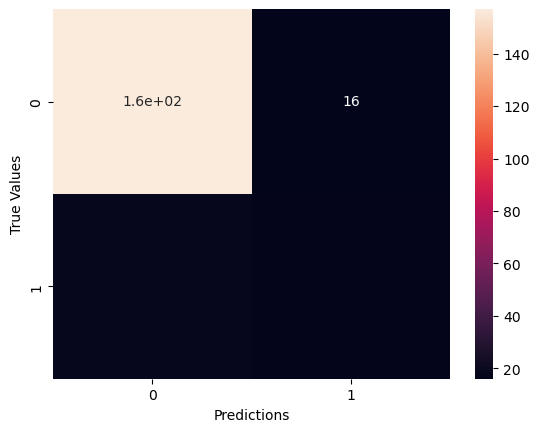

In [134]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")


In [135]:
print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       173
           1       0.52      0.49      0.50        35

    accuracy                           0.84       208
   macro avg       0.71      0.70      0.70       208
weighted avg       0.83      0.84      0.83       208



#### AdaBoostClassifer

In [136]:
model11=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),learning_rate=0.6)
model11.fit(x_train_smt,y_train_smt)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                   learning_rate=0.6)

In [137]:
model11.score(x_train_smt,y_train_smt)

1.0

In [138]:
model11.score(x_test,y_test)

0.8173076923076923

In [139]:
y_pred11=model11.predict(x_test)

In [140]:
pd.DataFrame({"True_values":y_test,"Predicted_values":y_pred11})

,True_values,Predicted_values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [141]:
scoreAda=accuracy_score(y_test,y_pred11)
scoreAda

0.8173076923076923

In [142]:
cm=confusion_matrix(y_test,y_pred11)
cm

array([[159,  14],
       [ 24,  11]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

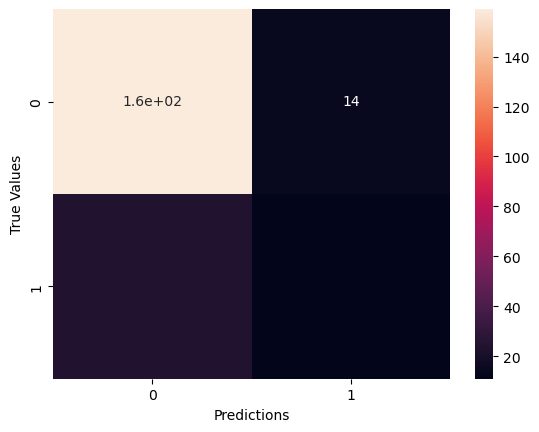

In [143]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")

In [144]:
print(classification_report(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       173
           1       0.44      0.31      0.37        35

    accuracy                           0.82       208
   macro avg       0.65      0.62      0.63       208
weighted avg       0.80      0.82      0.80       208



#### GradientBoostingClassifier

In [145]:
model12=GradientBoostingClassifier(max_depth=5, learning_rate=0.6)
model12.fit(x_train_smt,y_train_smt)

GradientBoostingClassifier(learning_rate=0.6, max_depth=5)

In [146]:
model12.score(x_train_smt,y_train_smt)

1.0

In [147]:
model12.score(x_test,y_test)

0.8317307692307693

In [148]:
y_pred12=model12.predict(x_test)

In [149]:
pd.DataFrame({"True Values":y_test,"Predicted Values":y_pred12})

,True Values,Predicted Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [150]:
scoreGrad=accuracy_score(y_test,y_pred12)
scoreGrad

0.8317307692307693

In [151]:
cm=confusion_matrix(y_test,y_pred12)
cm

array([[161,  12],
       [ 23,  12]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

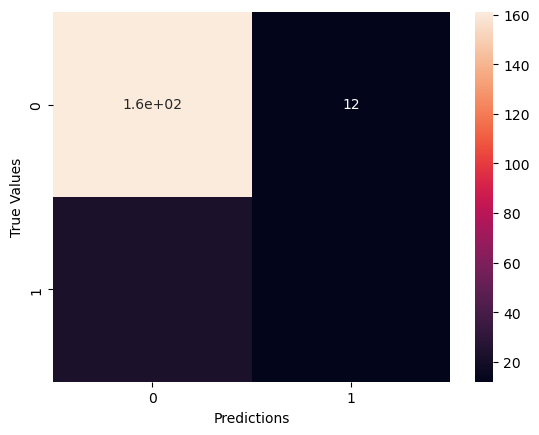

In [152]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")

In [153]:
print(classification_report(y_test,y_pred12))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       173
           1       0.50      0.34      0.41        35

    accuracy                           0.83       208
   macro avg       0.69      0.64      0.65       208
weighted avg       0.81      0.83      0.82       208



#### XGBoostClassifer

In [154]:
model13=XGBClassifier(learning_rate=0.6,max_depth=5)
model13.fit(x_train_smt,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
model13.score(x_train_smt,y_train_smt)

1.0

In [156]:
model13.score(x_test,y_test)

0.8509615384615384

In [157]:
y_pred13=model13.predict(x_test)

In [158]:
pd.DataFrame({"True Values":y_test,"Predicted_Values":y_pred13})

,True Values,Predicted_Values
788,0,0
854,0,0
771,0,0
768,0,0
236,1,1
...,...,...
99,0,0
1026,0,0
706,0,0
486,0,0


In [159]:
scoreXgb=accuracy_score(y_test,y_pred13)
scoreXgb

0.8509615384615384

In [160]:
cm=confusion_matrix(y_test,y_pred13)
cm

array([[161,  12],
       [ 19,  16]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

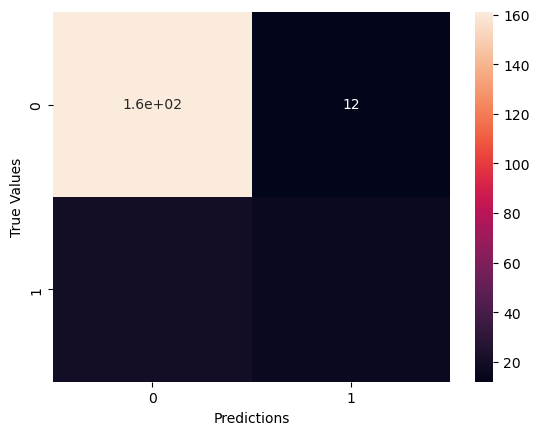

In [161]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")

In [162]:
print(classification_report(y_test,y_pred13))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       173
           1       0.57      0.46      0.51        35

    accuracy                           0.85       208
   macro avg       0.73      0.69      0.71       208
weighted avg       0.84      0.85      0.84       208



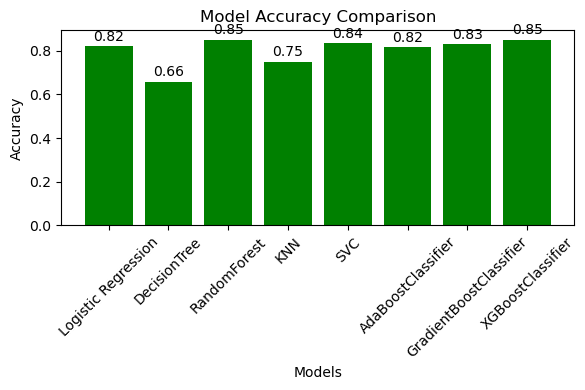

In [316]:
model_accuracies = {
    'Logistic Regression': [scorelr1],
    'DecisionTree': [scoreDT1],
    'RandomForest': [scoreRF2],
    'KNN': [scoreKNN2],
    'SVC': [scoreSVC2],
    "AdaBoostClassifier":[scoreAda],
    "GradientBoostClassifier":[scoreGrad],
    "XGBoostClassifier":[scoreXgb]
}

models = list(model_accuracies.keys())
accuracies = [score[0] for score in model_accuracies.values()]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color='green')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Applying Validation Techniques

#### a) K-fold Cross Validation

In [262]:
stratified_kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [263]:
kfold_rf_score=cross_val_score(model5,x_train_smt,y_train_smt,cv=stratified_kfold)
kfold_xgb_score=cross_val_score(model13,x_train_smt,y_train_smt,cv=stratified_kfold)

In [264]:
kfold_rf_score=kfold_rf_score.mean()
kfold_xgb_score=kfold_xgb_score.mean()

In [276]:
data1 = {
    "Model": ["RandomForestClassifier", "XGBoostClassifier"],
    "Scores without kfold": [scoreRF2, scoreXgb],
    "Scores with kfold": [kfold_rf_score, kfold_xgb_score]
}

df = pd.DataFrame(data1)
print(df)

                    Model  Scores without kfold  Scores with kfold
0  RandomForestClassifier              0.850962           0.901481
1       XGBoostClassifier              0.850962           0.895556


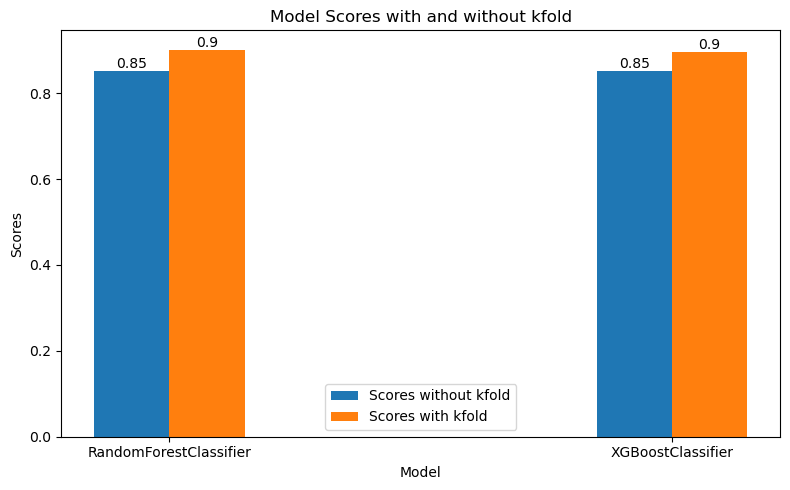

In [269]:
# Plot the bar graph
plt.figure(figsize=(8, 5))
bar_width = 0.15
index = df.index

# Plot the scores without kfold
plt.bar(index, df["Scores without kfold"], bar_width, label='Scores without kfold')

# Plot the scores with kfold
plt.bar(index + bar_width, df["Scores with kfold"], bar_width, label='Scores with kfold')

# Add labels to the bars
for i, score in enumerate(df["Scores without kfold"]):
    plt.text(i, score, round(score, 2), ha='center', va='bottom')
for i, score in enumerate(df["Scores with kfold"]):
    plt.text(i + bar_width, score, round(score, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Scores with and without kfold')
plt.xticks(index + bar_width / 2, df["Model"])
plt.legend()
plt.tight_layout()
plt.show()

#### b)Hyperparameter Tuning

In [324]:
gscv1=GridSearchCV(model5,
                  {"n_estimators":[1,3,5,10,15,20,25]},
                  cv=6)


In [325]:
gscv1.fit(x_train_smt, y_train_smt)


GridSearchCV(cv=6,
             estimator=RandomForestClassifier(n_estimators=50, random_state=1),
             param_grid={'n_estimators': [1, 3, 5, 10, 15, 20, 25]})

In [326]:
gscv1.best_params_

{'n_estimators': 20}

In [280]:
gscv1.best_score_

0.8844444444444445

In [281]:
pd.DataFrame(gscv1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002955,0.003261,0.000167,0.000374,1,{'n_estimators': 1},0.680000,0.728889,0.724444,0.715556,0.786667,0.755556,0.731852,0.033127,6
1,0.009736,0.002960,0.000000,0.000000,3,{'n_estimators': 3},0.648889,0.782222,0.848889,0.808889,0.840000,0.817778,0.791111,0.067159,5
2,0.010679,0.005887,0.000016,0.000035,5,{'n_estimators': 5},0.684444,0.808889,0.884444,0.853333,0.862222,0.826667,0.820000,0.065307,4
3,0.015654,0.000398,0.002606,0.005827,10,{'n_estimators': 10},0.688889,0.817778,0.928889,0.884444,0.915556,0.866667,0.850370,0.080601,3
4,0.027957,0.006711,0.001338,0.002992,15,{'n_estimators': 15},0.737778,0.848889,0.933333,0.897778,0.911111,0.893333,0.870370,0.064478,2
5,0.035680,0.008134,0.000000,0.000000,20,{'n_estimators': 20},0.733333,0.844444,0.946667,0.911111,0.937778,0.933333,0.884444,0.075556,1


In [282]:
gscv2=GridSearchCV(model13,
                  {"n_estimators":[1,3,5,10,15,20,25],
                   "learning_rate":[0.5,0.6,0.7],"max_depth":[3,5,10,15,20]},
                  cv=6)


In [283]:
gscv2.fit(x_train_smt, y_train_smt)

GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.6, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.6, 0.7],
                         'max_depth': [3, 5, 10, 15, 20],
                         'n_estimators': [1, 3, 5, 10, 15, 20, 25]})

In [284]:
gscv2.best_params_

{'learning_rate': 0.7, 'max_depth': 15, 'n_estimators': 25}

In [285]:
gscv2.best_score_

0.8940740740740741

In [286]:
pd.DataFrame(gscv2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008122,0.001108,0.000000,0.000000,0.5,3,1,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.600000,0.733333,0.777778,0.764444,0.742222,0.746667,0.727407,0.058832,103
1,0.012767,0.007828,0.001217,0.001467,0.5,3,3,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.657778,0.760000,0.893333,0.866667,0.777778,0.800000,0.792593,0.076537,90
2,0.006050,0.005922,0.002587,0.005784,0.5,3,5,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.635556,0.786667,0.871111,0.893333,0.862222,0.857778,0.817778,0.087846,86
3,0.007922,0.003511,0.001926,0.003013,0.5,3,10,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.684444,0.835556,0.893333,0.875556,0.911111,0.848889,0.841481,0.074664,73
4,0.009150,0.007007,0.004290,0.006272,0.5,3,15,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.693333,0.826667,0.920000,0.875556,0.911111,0.893333,0.853333,0.077661,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.020093,0.006742,0.000000,0.000000,0.7,20,5,"{'learning_rate': 0.7, 'max_depth': 20, 'n_est...",0.697778,0.817778,0.906667,0.920000,0.928889,0.893333,0.860741,0.081374,53
101,0.026058,0.007367,0.000000,0.000000,0.7,20,10,"{'learning_rate': 0.7, 'max_depth': 20, 'n_est...",0.711111,0.857778,0.937778,0.928889,0.920000,0.906667,0.877037,0.078532,29
102,0.028548,0.003864,0.002723,0.006089,0.7,20,15,"{'learning_rate': 0.7, 'max_depth': 20, 'n_est...",0.724444,0.853333,0.937778,0.942222,0.928889,0.906667,0.882222,0.076583,13
103,0.031249,0.000003,0.000000,0.000000,0.7,20,20,"{'learning_rate': 0.7, 'max_depth': 20, 'n_est...",0.733333,0.875556,0.933333,0.937778,0.933333,0.906667,0.886667,0.071882,6


In [312]:
data2={"Model":["RandomForestClassifier","XGBoostClassifier"],"Best_param":[gscv1.best_params_,gscv2.best_params_],
             "Best_score":[gscv1.best_score_,gscv2.best_score_]}
df1 = pd.DataFrame(data2)
print(df1)

                    Model                                         Best_param  \
0  RandomForestClassifier                               {'n_estimators': 20}   
1       XGBoostClassifier  {'learning_rate': 0.7, 'max_depth': 15, 'n_est...   

   Best_score  
0    0.884444  
1    0.894074  


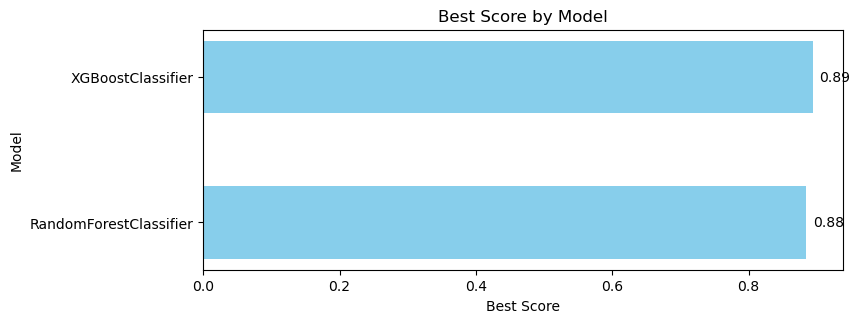

In [313]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 3))
# Reduce bar height
bar_width = 0.5

# Horizontal bar plot
ax.barh(df1["Model"], df1["Best_score"], color='skyblue',height=bar_width)
ax.set_xlabel('Best Score')
ax.set_ylabel('Model')
ax.set_title('Best Score by Model')

# Add text labels
for i, v in enumerate(df1["Best_score"]):
    ax.text(v + 0.01, i, f'{v:.2f}', color='black', ha='left', va='center')
# Reduce space between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

In [319]:
data3 = {
    "Model": ["RandomForestClassifier", "XGBoostClassifier"],
    "Scores without Hyperparameter Tuning": [scoreRF2, scoreXgb],
    "Scores with Hyperparameter Tuning": [gscv1.best_score_, gscv2.best_score_]
}

df3 = pd.DataFrame(data3)
print(df3)

                    Model  Scores without Hyperparameter Tuning  \
0  RandomForestClassifier                              0.850962   
1       XGBoostClassifier                              0.850962   

   Scores with Hyperparameter Tuning  
0                           0.884444  
1                           0.894074  


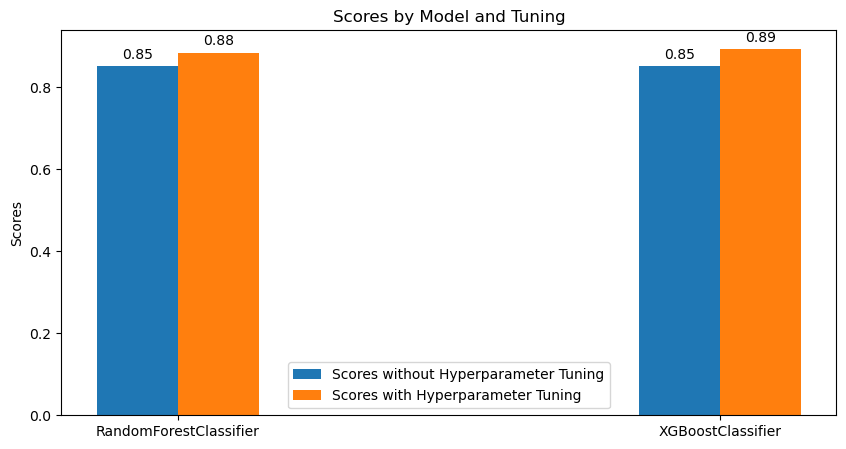

In [323]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Bar width
bar_width = 0.15

# Position of bars on x-axis
x = df3.index

# Plot bars
rects1 = ax.bar(x - bar_width/2, df3["Scores without Hyperparameter Tuning"], bar_width, label="Scores without Hyperparameter Tuning")
rects2 = ax.bar(x + bar_width/2, df3["Scores with Hyperparameter Tuning"], bar_width, label="Scores with Hyperparameter Tuning")

# Add labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha="center", va="bottom")

add_labels(rects1)
add_labels(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Tuning')
ax.set_xticks(x)
ax.set_xticklabels(df3["Model"])
ax.legend()

plt.show()
